In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


In [10]:
from google.colab import files
uploaded = files.upload()

Saving logistic_regression_data.txt to logistic_regression_data (1).txt


In [11]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['logistic_regression_data.txt']))
# Dataset is now stored in a Pandas Dataframe

In [12]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

data = load_data("logistic_regression_data.txt", None)



In [13]:
X = data.iloc[:,:-1] # so "[:,:-1] " selects every column except the last column ... 
#incase you wanted to do something ( for n columns ) Select everything EXCEPT the last 3 columns, do this using iloc
# you would have done x = data.iloc[:,:-3]  # or precisly "iloc[:,:-3]" this .
#for more info  - https://stackoverflow.com/questions/53608653/how-to-select-all-but-the-3-last-columns-of-a-dataframe-n-python

y = data.iloc[ : , -1]
# "[ : , -1] "  this selects the last column 
#https://stackoverflow.com/questions/40144769/how-to-select-the-last-column-of-dataframe
# y = target values, last column of the data frame


admitted = data.loc[ y == 1]
 # filter out the applicants that got admitted


not_admitted = data.loc[y==0]
 # filter out the applicants that got admitted
print("yes")



yes


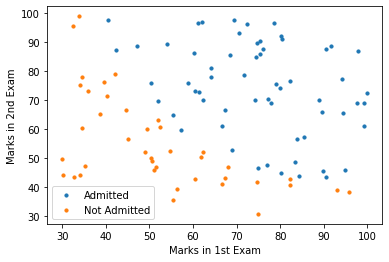

In [21]:
#plots

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()


In [15]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [26]:
# Using scikit-learn
model = LogisticRegression()
model.fit(X, y)
parameters = model.coef_
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters using scikit learn")
print(parameters)


#x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
#y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

#plt.plot(x_values, y_values, label='Decision Boundary')
#plt.xlabel('Marks in 1st Exam')
#plt.ylabel('Marks in 2nd Exam')
#plt.legend()
#plt.show()

The accuracy score using scikit-learn is 0.89
The model parameters using scikit learn
[[-4.19885865e-08  2.05354461e-01  2.00583554e-01]]
-4.198858653802694e-08


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
